In [1]:
# IMporting libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Reading the data from combined csv file
df = pd.read_csv(r'E:\Git Demo\CDAC_Group_Project\Project_dataset\combined.csv')

In [3]:
# checking the data
df.head()

,Unnamed: 0,reviewText,class
0,0,This is a well fitting case that really helps...,1
1,1,This is my first IEM which are not UE. I love ...,0
2,2,"I am satisfied, but placing my phone in a pant...",1
3,3,This case can be found listed as 7.25&#34; hig...,0
4,4,This is very nice and very smart. The other e...,1


In [4]:
df.describe

<bound method NDFrame.describe of          Unnamed: 0                                         reviewText  class
0                 0  This is a  well fitting case that really helps...      1
1                 1  This is my first IEM which are not UE. I love ...      0
2                 2  I am satisfied, but placing my phone in a pant...      1
3                 3  This case can be found listed as 7.25&#34; hig...      0
4                 4  This is very nice and very smart.  The other e...      1
...             ...                                                ...    ...
1799995     1799995  There is a ton of bounce outs; at times it doe...      0
1799996     1799996  My Granddaughter wanted to get locked journals...      1
1799997     1799997  We bought 2 of these, one for our 3yr old son ...      0
1799998     1799998  I do not have &#34;hands on&#34; experience wi...      0
1799999     1799999  On one hand I was glad my order arrived quickl...      0

[1800000 rows x 3 columns]>

In [5]:
# Separating x and y values
x = df['reviewText']
y = df['class']

In [6]:
# The tf.data.Dataset.from_tensor_slices method in TensorFlow is used to create a tf.data.Dataset object from tensors where each tensor 
# corresponds to a slice of the input data. This method is particularly useful when you have a set of tensors that represent slices of a larger 
# dataset and you want to combine them into a single dataset that can be iterated over in batches.

text_dataset = tf.data.Dataset.from_tensor_slices(x)

The tf.keras.layers.TextVectorization layer is a preprocessing layer designed to map text features to integer sequences. It is particularly useful for handling natural language inputs in machine learning models. The max_tokens parameter specifies the maximum size of the vocabulary, output_mode determines the type of output (integer sequences in this case), and output_sequence_length sets the length to which the outputs will be padded.

In the provided code snippet, max_features is set to 10000, which means the vocabulary size will be limited to 10000 unique tokens. max_len is set to 1000, indicating that the output sequences will be padded to a length of 1000 tokens.

The adapt method is called on the vectorize_layer with text_dataset.batch(64) as its argument. This method analyzes the dataset, determines the frequency of individual string values, and creates a vocabulary from the most frequent terms. The batch size of 64 suggests that the adaptation process will go through the dataset in chunks of 64 samples at a time, which can be more memory-efficient for large datasets.

Here's a breakdown of the key aspects of the TextVectorization layer:

Standardization: By default, the layer lowercases the text and removes punctuation.
Tokenization: The layer splits the text on whitespace into tokens.
Vocabulary Building: During the adapt phase, the layer learns a vocabulary based on the frequency of tokens in the dataset.
Output Mode: The output_mode='int' indicates that the layer will output integer token indices.
Sequence Length: The output_sequence_length=max_len ensures that the output sequences are padded or truncated to max_len tokens.
After adapting, the layer is ready to transform text into integer sequences, which can then be used as input for models such as embeddings or recurrent neural networks.

In [7]:
max_features = 10000
max_len = 1000
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=max_features,
 output_mode='int',
 output_sequence_length=max_len)

vectorize_layer.adapt(text_dataset.batch(64))

In [8]:
# Splitting the Data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#Checking the first 20 elements of the vocabulary
vocab = np.array(vectorize_layer.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'and', 'to', 'it', 'a', 'is', 'this',
       'of', 'for', 'my', 'in', 'that', 'with', 'on', 'not', 'was', 'but'],
      dtype='<U15')

In [14]:
# Model 
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Model Training
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
22500/22500 [==============================] - 1516s 67ms/step - loss: 0.3921 - accuracy: 0.8437 - val_loss: 0.3495 - val_accuracy: 0.8656
Epoch 2/10
22500/22500 [==============================] - 1482s 66ms/step - loss: 0.3461 - accuracy: 0.8726 - val_loss: 0.9458 - val_accuracy: 0.4995
Epoch 3/10
22500/22500 [==============================] - 1483s 66ms/step - loss: 0.3613 - accuracy: 0.8754 - val_loss: 0.3334 - val_accuracy: 0.8790
Epoch 4/10
22500/22500 [==============================] - 1483s 66ms/step - loss: 0.3689 - accuracy: 0.8771 - val_loss: 0.3654 - val_accuracy: 0.8903
Epoch 5/10
22500/22500 [==============================] - 1481s 66ms/step - loss: 0.4462 - accuracy: 0.8761 - val_loss: 0.4019 - val_accuracy: 0.8786
Epoch 6/10
22500/22500 [==============================] - 1470s 65ms/step - loss: 0.4351 - accuracy: 0.8762 - val_loss: 0.3608 - val_accuracy: 0.8830
Epoch 7/10
22500/22500 [==============================] - 1462s 65ms/step - loss: 0.4617 - accuracy:

In [17]:
loss_df = pd.DataFrame(model.history.history)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
import matplotlib.pyplot as plt

In [20]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.392142,0.843657,0.349531,0.865633
1,0.346094,0.872561,0.945795,0.499536
2,0.361278,0.875394,0.333435,0.879031
3,0.368935,0.877058,0.365425,0.890339
4,0.446184,0.876074,0.401916,0.878611
5,0.435103,0.876245,0.360758,0.883042
6,0.461698,0.870831,0.375115,0.885264
7,0.530599,0.871839,0.383144,0.886611
8,0.483384,0.872099,0.365026,0.890036
9,0.364249,0.886329,0.391299,0.881292


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Training Loss vs Accuracy'}>

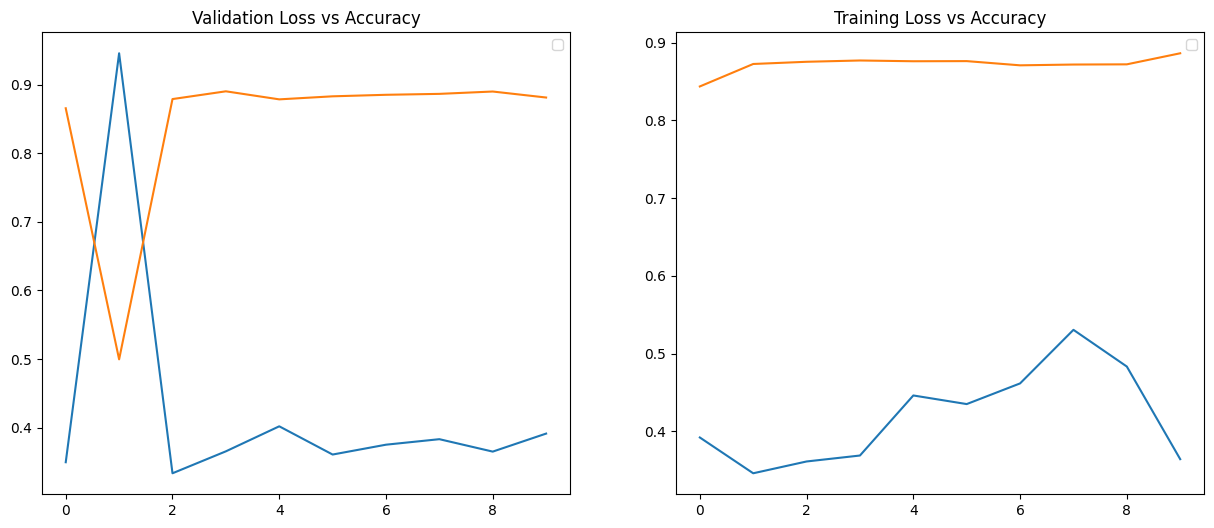

In [30]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

axes1 = axes[0]
plt.plot(loss_df[['loss','accuracy']])
plt.title('Training Loss vs Accuracy')
plt.axes(axes1)

axes2 = axes[1]

plt.plot(loss_df[['val_loss','val_accuracy']])
plt.title('Validation Loss vs Accuracy')
plt.axes(axes2)

In [31]:
import joblib 
joblib.dump(model, 'LSTM_04(Model_Trained_on_complete_data).joblib')

INFO:tensorflow:Assets written to: ram://26053f14-4b9f-49ba-a1e6-814406410a96/assets


INFO:tensorflow:Assets written to: ram://26053f14-4b9f-49ba-a1e6-814406410a96/assets


['LSTM_04(Model_Trained_on_complete_data).joblib']

In [33]:
model.save_weights('LSTM_04_model_weights.tf')